# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
#Type your code here
df = pd.read_csv('../namadataset_raw/Supplement-Sales-Weekly-Expanded_raw.csv')
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Melihat Tipe Data

In [4]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


untuk tipe data dari colom 'Date' belum sesuai harusnya tipe datanya adalah date.

### Melihat Statistik Deskriptif

In [5]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


### Melihat Missing Value

In [6]:
df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

ternyata tidak ada data yang missing value

### Melihat Data Duplicate

In [7]:
df.duplicated().sum()

np.int64(0)

tidak ada yang duplikat

### Menampilkan data unik dari data categorikal

In [8]:
print(df['Category'].unique())
print(df['Location'].unique())
print(df['Platform'].unique())

['Protein' 'Vitamin' 'Omega' 'Performance' 'Amino Acid' 'Mineral' 'Herbal'
 'Sleep Aid' 'Fat Burner' 'Hydration']
['Canada' 'UK' 'USA']
['Walmart' 'Amazon' 'iHerb']


### Visualisasi Total Unit Terjual Berdasarkan Kategori Produk

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_3748\1488974764.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Category", y="Units Sold", data=category_sales, palette='viridis')


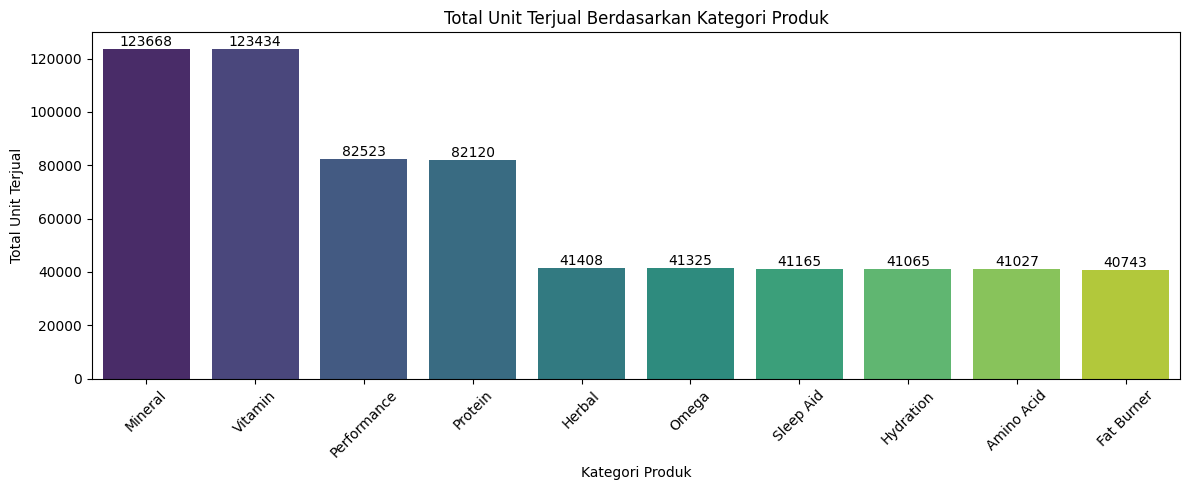

In [9]:
# Hitung total units sold per kategori
category_sales = df.groupby('Category')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 5))
ax = sns.barplot(x="Category", y="Units Sold", data=category_sales, palette='viridis')
plt.title("Total Unit Terjual Berdasarkan Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Total Unit Terjual")
plt.xticks(rotation=45)

# Tambahkan label di atas bar
for p in ax.patches:
    total = p.get_height()
    ax.annotate(f'{total:.0f}', 
                (p.get_x() + p.get_width() / 2., total),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Visualisasi Total Unit Dikembalikan Berdasarkan Kategori Produk

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_3748\1856130868.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Units Returned', data=returned_per_category, palette='viridis')


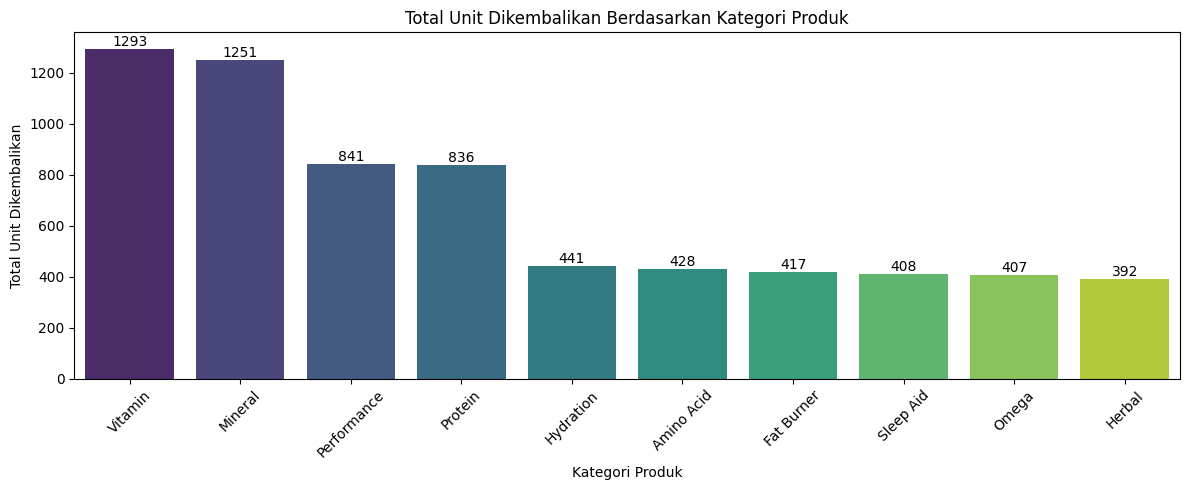

In [10]:
# Hitung total units returned per kategori
returned_per_category = df.groupby('Category')['Units Returned'].sum().reset_index().sort_values(by='Units Returned', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='Category', y='Units Returned', data=returned_per_category, palette='viridis')
plt.title("Total Unit Dikembalikan Berdasarkan Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Total Unit Dikembalikan")
plt.xticks(rotation=45)

# Tambahkan label angka di atas batang
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.0f}', 
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Visualisasi Total Unit Terjual Berdasarkan Negara

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_3748\1718147070.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Location', y='Units Sold', data=country_sales, palette='Set2')


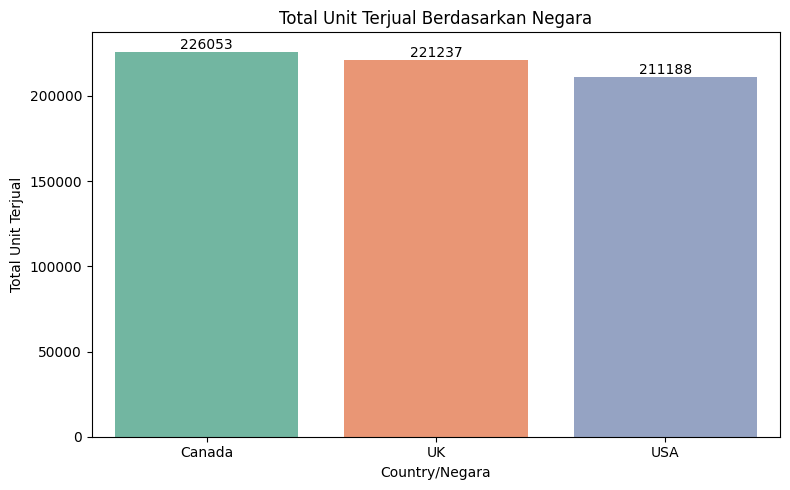

In [11]:
# Hitung total units sold per negara
country_sales = df.groupby('Location')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Location', y='Units Sold', data=country_sales, palette='Set2')
plt.title("Total Unit Terjual Berdasarkan Negara")
plt.xlabel("Country/Negara")
plt.ylabel("Total Unit Terjual")

# Tambahkan label angka di atas batang
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.0f}', 
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Visualisasi 10 Produk dengan Revenue Tertinggi

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_3748\3130726781.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Revenue', y='Product Name', data=top_products, palette='Blues_d')


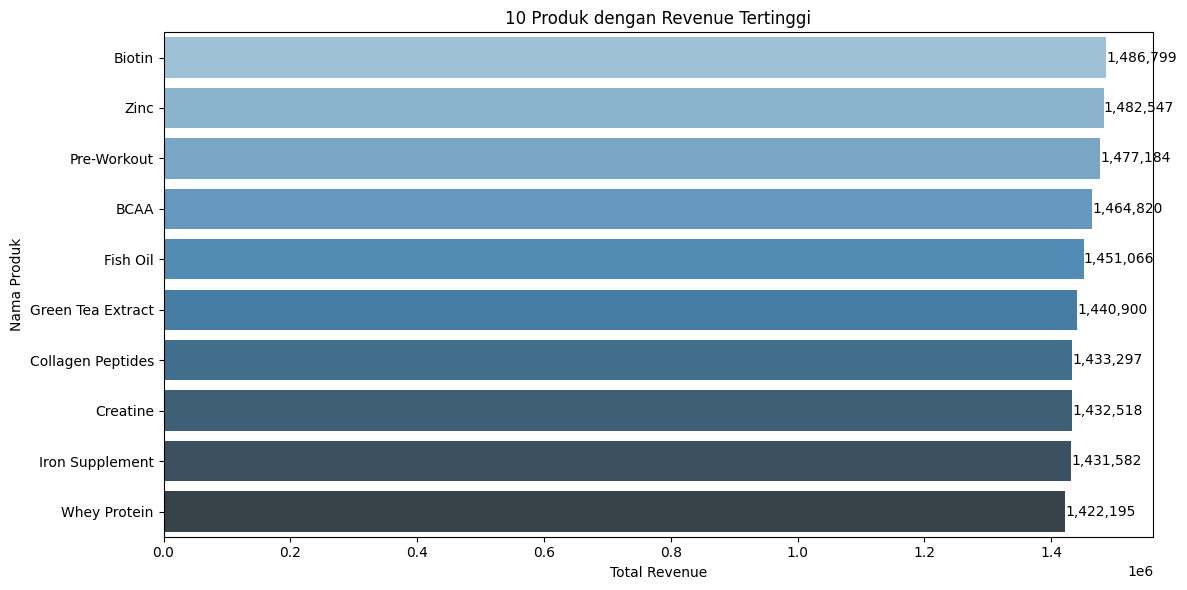

In [12]:
# Hitung total revenue per produk
top_products = df.groupby('Product Name')['Revenue'].sum().reset_index()

# Ambil 10 produk teratas
top_products = top_products.sort_values(by='Revenue', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Revenue', y='Product Name', data=top_products, palette='Blues_d')
plt.title("10 Produk dengan Revenue Tertinggi")
plt.xlabel("Total Revenue")
plt.ylabel("Nama Produk")

# Tambahkan label angka di samping batang
for p in ax.patches:
    value = p.get_width()
    ax.annotate(f'{value:,.0f}', 
                (value + 500, p.get_y() + p.get_height() / 2.),
                va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Visualisasi 10 Produk Terlaris Berdasarkan Jumlah Unit Terjual

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_3748\1597785124.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Units Sold', y='Product Name', data=top_selling, palette='mako')


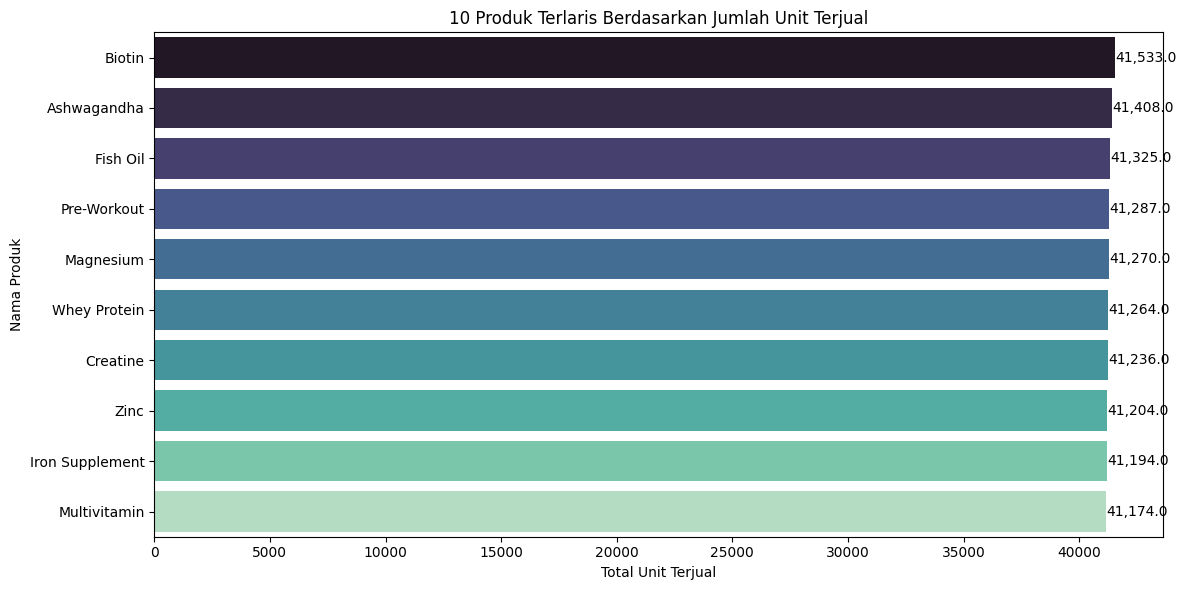

In [13]:
# Hitung total units sold per produk
top_selling = df.groupby('Product Name')['Units Sold'].sum().reset_index()

# Ambil 10 produk terlaris
top_selling = top_selling.sort_values(by='Units Sold', ascending=False).head(10)

# Plot bar chart horizontal
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Units Sold', y='Product Name', data=top_selling, palette='mako')
plt.title("10 Produk Terlaris Berdasarkan Jumlah Unit Terjual")
plt.xlabel("Total Unit Terjual")
plt.ylabel("Nama Produk")

# Tambahkan label angka di samping batang
for p in ax.patches:
    value = p.get_width()
    ax.annotate(f'{value:,}', 
                (value + 10, p.get_y() + p.get_height() / 2.),
                va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Visualisasi Relationship Between Discount Rate and Number of Sales

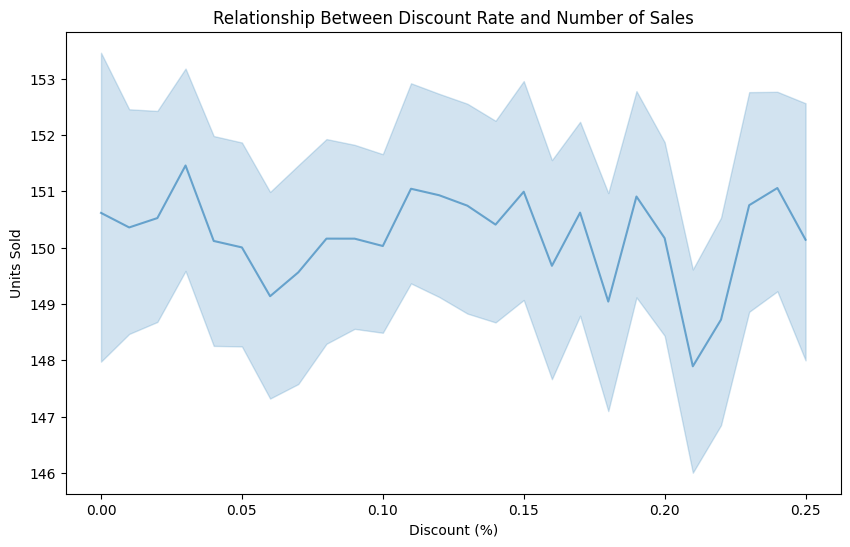

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Discount", y="Units Sold", data=df, alpha=0.6)

plt.title("Relationship Between Discount Rate and Number of Sales")
plt.xlabel("Discount (%)")
plt.ylabel("Units Sold")
plt.show()

### Melihat Data Outlier pada data numerik

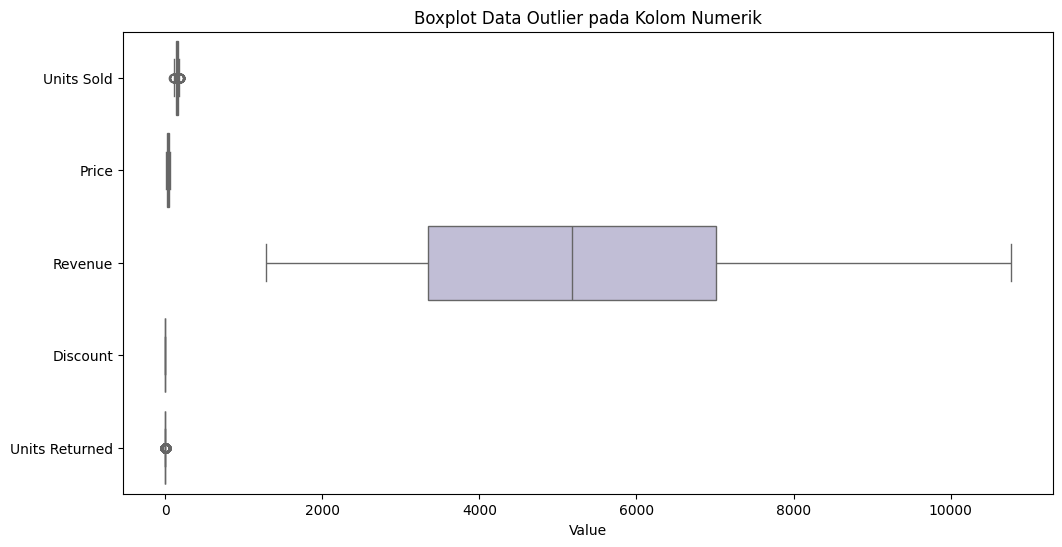

In [15]:
numeric_data=df.select_dtypes(include=["float64","int64"])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_data, orient='h', palette='Set3')
plt.title("Boxplot Data Outlier pada Kolom Numerik")
plt.xlabel("Value")
plt.show()

### Menampilkan Correlation Matrix

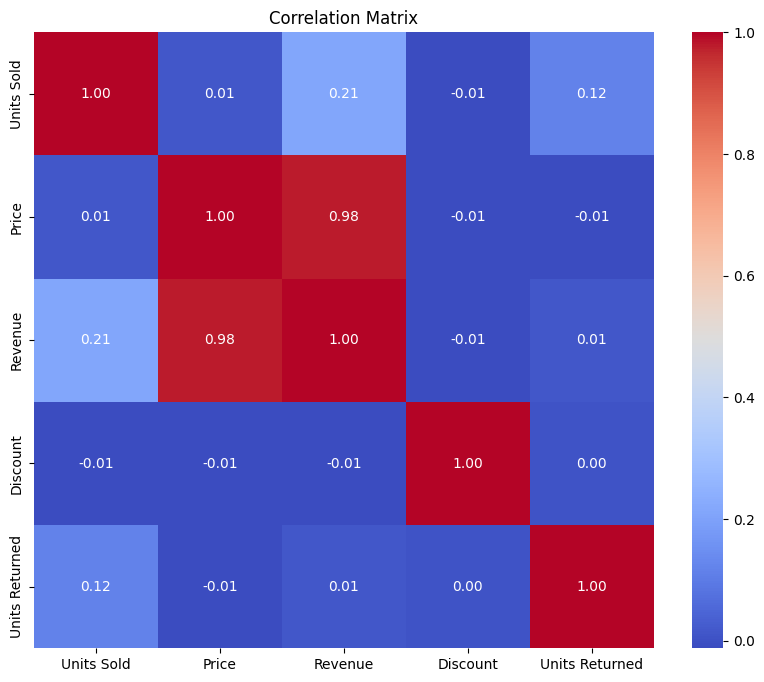

In [16]:
numeric_data=df.select_dtypes(include=["float64","int64"])
correlation_matrix=numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Menampilkan Correlation Fitur Revenue dan Price

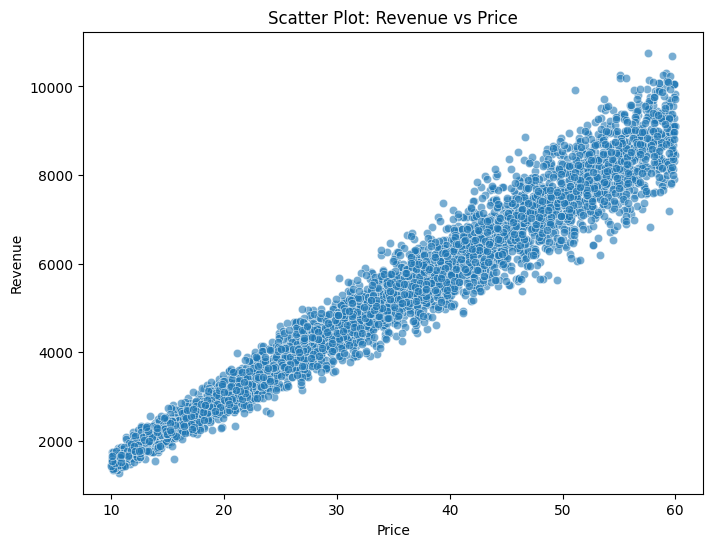

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Revenue', data=df, alpha=0.6)
plt.title('Scatter Plot: Revenue vs Price')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Menghapus  Fitur Date

In [18]:
df = df.drop(columns=['Date'])
df.head()

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    4384 non-null   object 
 1   Category        4384 non-null   object 
 2   Units Sold      4384 non-null   int64  
 3   Price           4384 non-null   float64
 4   Revenue         4384 non-null   float64
 5   Discount        4384 non-null   float64
 6   Units Returned  4384 non-null   int64  
 7   Location        4384 non-null   object 
 8   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 308.4+ KB


### Encoding Data Categorikal

In [20]:
# Menentukan kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Lakukan label encoding untuk setiap kolom kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,14,7,143,31.98,4573.14,0.03,2,0,1
1,13,9,139,42.51,5908.89,0.04,0,1,0
2,6,5,161,12.91,2078.51,0.25,0,0,0
3,11,9,140,16.07,2249.80,0.08,0,0,1
4,12,6,157,35.47,5568.79,0.25,3,0,2


### Standarisasi Fitur Numerik

In [21]:
# Standarisasi fitur numerik
scaler = StandardScaler()
numeric_cols = numeric_data.columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,14,7,-0.580916,-0.197316,-0.298064,-1.315034,0.372335,0,1
1,13,9,-0.903635,0.544407,0.311243,-1.175727,-1.217067,1,0
2,6,5,0.871319,-1.540587,-1.436000,1.749735,-1.217067,0,0
3,11,9,-0.822955,-1.318000,-1.357865,-0.618496,-1.217067,0,1
4,12,6,0.548600,0.048516,0.156105,1.749735,1.167036,0,2


In [22]:
# Simpan hasil data preprocessing ke file CSV
df.to_csv('Supplement-Sales-Weekly-Expanded_preprocessing.csv', index=False)